In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional

In [10]:
def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Title

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/title_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/fake-news/vocab_size_title.txt'))

In [5]:
print(vocab_size)

22625


In [6]:
X_train.shape, X_test.shape, X_valid.shape

((10942, 30), (3652, 30), (3617, 30))

## LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.4), 
- LSTM(4), 
- Dropout(0.4), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.5) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [7]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=30, output_dim=4))
model.add(Dropout(rate=0.4))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.4))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 4)             90500     
                                                                 
 dropout (Dropout)           (None, 30, 4)             0         
                                                                 
 lstm (LSTM)                 (None, 4)                 144       
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 100)               500       
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 5
)

Epoch 1/5
342/342 [==============================] - 12s 14ms/step - loss: 0.4444 - accuracy: 0.7759 - val_loss: 0.2088 - val_accuracy: 0.9071
Epoch 2/5
342/342 [==============================] - 4s 11ms/step - loss: 0.2038 - accuracy: 0.9154 - val_loss: 0.1847 - val_accuracy: 0.9184
Epoch 3/5
342/342 [==============================] - 4s 11ms/step - loss: 0.1459 - accuracy: 0.9413 - val_loss: 0.1808 - val_accuracy: 0.9289
Epoch 4/5
342/342 [==============================] - 4s 11ms/step - loss: 0.1113 - accuracy: 0.9563 - val_loss: 0.1946 - val_accuracy: 0.9276
Epoch 5/5
342/342 [==============================] - 4s 11ms/step - loss: 0.0877 - accuracy: 0.9656 - val_loss: 0.2149 - val_accuracy: 0.9259


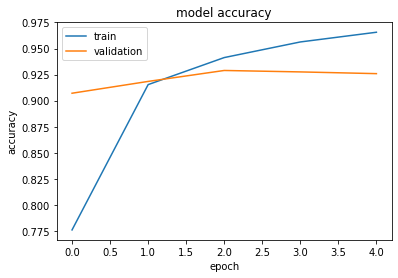

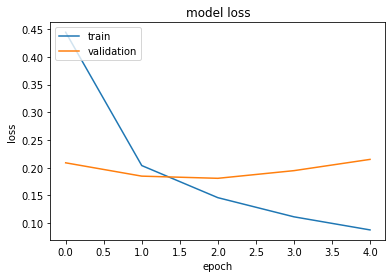

In [11]:
plot_history(history)

In [13]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

115/115 [==============================] - 1s 5ms/step - loss: 0.2306 - accuracy: 0.9184
Test score: 0.23062476515769958
Test accuracy: 0.9184008836746216


In [14]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [15]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2042
           1       0.91      0.90      0.91      1610

    accuracy                           0.92      3652
   macro avg       0.92      0.92      0.92      3652
weighted avg       0.92      0.92      0.92      3652



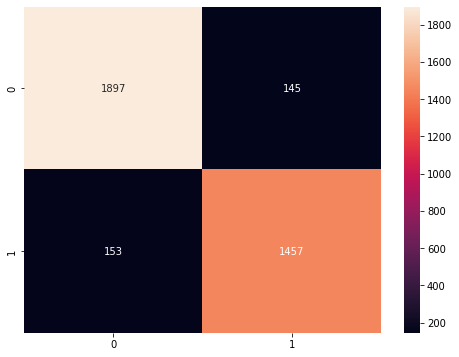

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.4), 
- Bi-LSTM(4), 
- Dropout(0.4), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.5) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [17]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=30, output_dim=4))
model.add(Dropout(rate=0.4))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.4))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 4)             90500     
                                                                 
 dropout_3 (Dropout)         (None, 30, 4)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 8)                288       
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 100)               900       
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                      

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 5
)

Epoch 1/5
342/342 [==============================] - 11s 21ms/step - loss: 0.4238 - accuracy: 0.7843 - val_loss: 0.2154 - val_accuracy: 0.8991
Epoch 2/5
342/342 [==============================] - 6s 18ms/step - loss: 0.1937 - accuracy: 0.9172 - val_loss: 0.1820 - val_accuracy: 0.9229
Epoch 3/5
342/342 [==============================] - 7s 19ms/step - loss: 0.1343 - accuracy: 0.9471 - val_loss: 0.1822 - val_accuracy: 0.9289
Epoch 4/5
342/342 [==============================] - 7s 19ms/step - loss: 0.0954 - accuracy: 0.9610 - val_loss: 0.2035 - val_accuracy: 0.9267
Epoch 5/5
342/342 [==============================] - 7s 19ms/step - loss: 0.0777 - accuracy: 0.9695 - val_loss: 0.2277 - val_accuracy: 0.9265


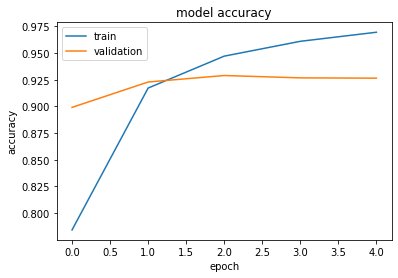

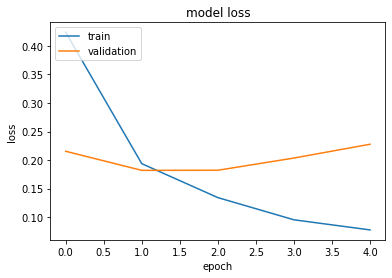

In [20]:
plot_history(history)

In [21]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

115/115 [==============================] - 1s 7ms/step - loss: 0.2552 - accuracy: 0.9181
Test score: 0.2551579177379608
Test accuracy: 0.9181270599365234


In [22]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [23]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2042
           1       0.91      0.90      0.91      1610

    accuracy                           0.92      3652
   macro avg       0.92      0.92      0.92      3652
weighted avg       0.92      0.92      0.92      3652



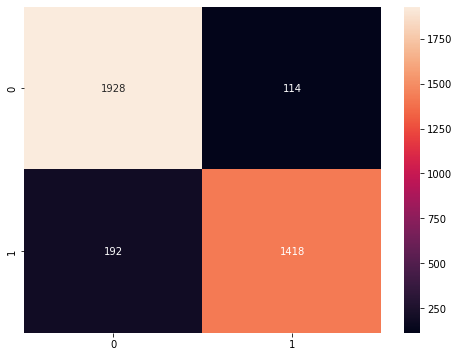

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Text

In [24]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/fake-news/vocab_size_text.txt'))

In [25]:
print(vocab_size)

193874


In [26]:
X_train.shape, X_test.shape, X_valid.shape

((10942, 1200), (3652, 1200), (3617, 1200))

## LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.4), 
- LSTM(4), 
- Dropout(0.4), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.5) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [34]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.4))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.4))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_9 (Dropout)         (None, 1200, 4)           0         
                                                                 
 lstm_3 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_10 (Dropout)        (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 100)               500       
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [35]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 5
)

Epoch 1/5
342/342 [==============================] - 55s 153ms/step - loss: 0.5015 - accuracy: 0.7315 - val_loss: 0.2078 - val_accuracy: 0.9245
Epoch 2/5
342/342 [==============================] - 51s 150ms/step - loss: 0.2406 - accuracy: 0.9104 - val_loss: 0.1992 - val_accuracy: 0.9259
Epoch 3/5
342/342 [==============================] - 51s 150ms/step - loss: 0.1486 - accuracy: 0.9432 - val_loss: 0.1619 - val_accuracy: 0.9442
Epoch 4/5
342/342 [==============================] - 51s 150ms/step - loss: 0.0988 - accuracy: 0.9612 - val_loss: 0.1810 - val_accuracy: 0.9439
Epoch 5/5
342/342 [==============================] - 51s 150ms/step - loss: 0.0929 - accuracy: 0.9636 - val_loss: 0.2543 - val_accuracy: 0.9234


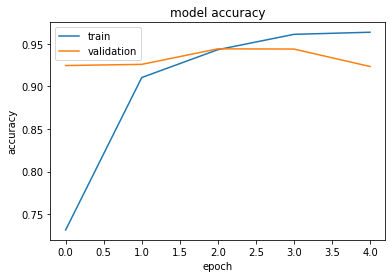

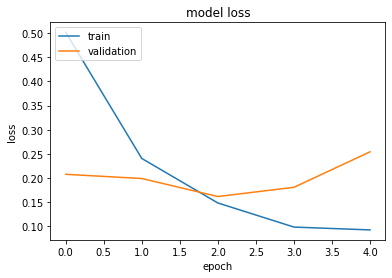

In [37]:
plot_history(history)

In [38]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

115/115 [==============================] - 7s 62ms/step - loss: 0.2395 - accuracy: 0.9272
Test score: 0.23948697745800018
Test accuracy: 0.9271631836891174


In [39]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [40]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2042
           1       0.88      0.97      0.92      1610

    accuracy                           0.93      3652
   macro avg       0.93      0.93      0.93      3652
weighted avg       0.93      0.93      0.93      3652



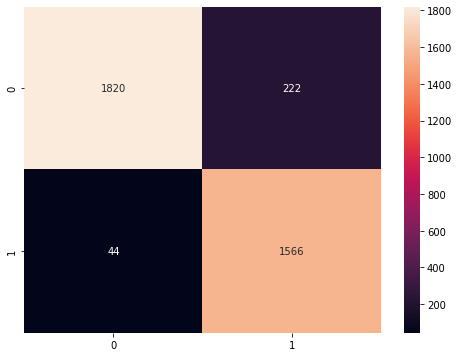

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.4), 
- Bi-LSTM(4), 
- Dropout(0.4), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.5) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [42]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.4))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.4))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_12 (Dropout)        (None, 1200, 4)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 8)                288       
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 100)               900       
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                      

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 5
)

Epoch 1/5
342/342 [==============================] - 110s 312ms/step - loss: 0.5599 - accuracy: 0.6903 - val_loss: 0.2569 - val_accuracy: 0.9002
Epoch 2/5
342/342 [==============================] - 105s 307ms/step - loss: 0.2799 - accuracy: 0.8901 - val_loss: 0.2928 - val_accuracy: 0.8999
Epoch 3/5
342/342 [==============================] - 105s 306ms/step - loss: 0.1767 - accuracy: 0.9342 - val_loss: 0.1500 - val_accuracy: 0.9458
Epoch 4/5
342/342 [==============================] - 106s 309ms/step - loss: 0.1068 - accuracy: 0.9631 - val_loss: 0.2551 - val_accuracy: 0.9207
Epoch 5/5
342/342 [==============================] - 106s 309ms/step - loss: 0.0865 - accuracy: 0.9693 - val_loss: 0.1554 - val_accuracy: 0.9489


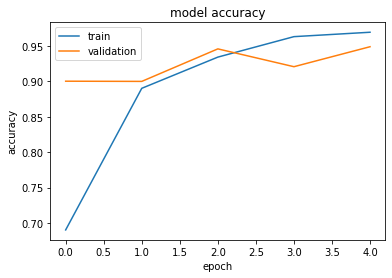

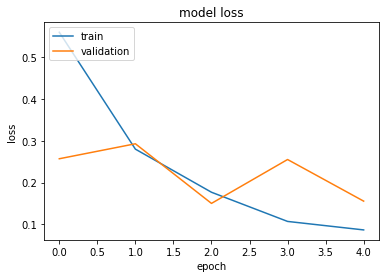

In [45]:
plot_history(history)

In [46]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

115/115 [==============================] - 14s 120ms/step - loss: 0.1393 - accuracy: 0.9556
Test score: 0.1392645239830017
Test accuracy: 0.9556407332420349


In [47]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [48]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2042
           1       0.97      0.93      0.95      1610

    accuracy                           0.96      3652
   macro avg       0.96      0.95      0.95      3652
weighted avg       0.96      0.96      0.96      3652



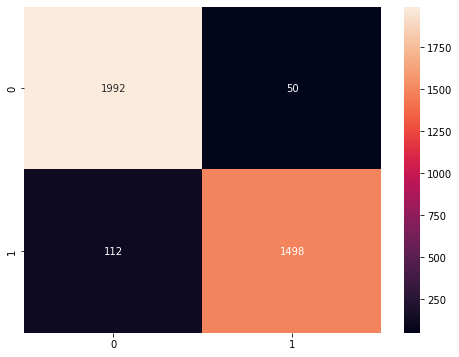

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()